In [1]:
# Only need to do this the first time, then restart the kernel
%pip install photutils --no-deps

Note: you may need to restart the kernel to use updated packages.


In [2]:
#run startup.py
import importlib as im
import numpy as np
import scipy as sp
import imageio as im
# %matplotlib inline
# conda update astropy
import matplotlib as mpl
mpl.rcParams['image.origin'] = 'lower'
mpl.rcParams['image.interpolation'] = 'nearest'
mpl.rcParams['image.cmap'] = 'Greys_r'
import matplotlib.pyplot as plt
from scipy import ndimage
from astropy.io import fits
from astropy.io.fits import getheader
from astropy.io.fits import getdata
from astropy.visualization import (MinMaxInterval, SqrtStretch, ImageNormalize)

from astropy import units as u
from photutils.aperture import aperture_photometry
from photutils.aperture import CircularAperture

In [68]:
pos_star = [[566.271833, 527.936605], [564.179743, 525.161502], [580.455309, 522.959352], [591.524384, 527.588695], [605.541445, 524.260185], [473.58807, 480.066184], [482.942919, 481.020788], [489.591759, 529.464778], [522.070347, 523.116215], [566.7875, 530.628676], [564.379407, 528.191835], [591.473943, 525.506587], [575.757426, 522.095544], [566.591891, 533.040644], [565.697411, 529.129683], [584.533221, 526.198837], [592.137812, 535.173836], [603.674376, 527.320067], [583.20903, 527.321265], [596.494568, 525.105032], [605.656838, 523.716367], [592.073448, 542.607572], [517.416317, 484.147732], [514.349722, 487.586812], [499.874923, 515.974508], [494.38808, 493.349839], [496.037151, 546.064538], [554.148421, 532.378092], [573.276808, 549.802774], [596.161736, 541.88794], [590.971649, 552.485902], [614.45019, 535.10502], [601.958823, 558.13553], [547.811216, 521.972934], [512.579441, 505.133026], [488.669855, 494.070359], [534.14095, 535.778585], [559.610713, 537.471869], [585.566827, 535.486446], [612.221246, 546.598948], [589.291915, 541.592955], [513.0159, 482.986998], [499.223556, 468.75348], [535.933712, 532.375619], [570.787001, 537.285682], [568.944762, 545.640419], [587.668823, 545.118777], [602.825815, 550.203918], [607.190896, 540.731964]]
pos_ref = [[822.430131 , 584.68482], [308.077216 , 468.378252], [324.385778 , 466.205276], [335.451584 , 470.647248], [349.567295 , 467.340499], [720.518506 , 550.552141], [730.331612 , 551.490416], [736.998992 , 599.800952], [769.047556 , 593.523368], [822.618145 , 587.301288], [308.331841 , 471.426071], [335.707294 , 468.981013], [319.668466 , 465.033751], [822.483991 , 589.957358], [309.533966 , 472.407225], [328.33896 , 469.488376], [335.725117 , 478.477722], [347.177202 , 470.353315], [327.315468 , 470.635486], [340.517163 , 468.313869], [349.638612 , 466.772921], [336.364428 , 485.784926], [270.06698 , 414.084254], [761.532804 , 558.113392], [746.990045 , 586.411777], [742.072639 , 564.167696], [742.840673 , 616.209796], [810.178967 , 589.241318], [317.129559 , 493.120804], [340.084377 , 485.282904], [334.797697 , 495.854674], [358.234234 , 478.172327], [346.020217 , 501.372235], [794.982289 , 592.494029], [760.097591 , 575.714367], [735.765881 , 564.917447], [780.696364 , 606.199684], [806.412317 , 607.867548], [841.91132 , 592.439512], [355.579578 , 489.995935], [333.15668 , 484.749682], [760.181303 , 553.37974], [746.508046 , 539.164678], [783.330994 , 602.548269], [826.752817 , 593.963945], [312.925913 , 488.778533], [331.467176 , 488.360801], [346.880125 , 493.345267], [350.753341 , 484.032719]]

In [72]:
#get file that contains name of files to look at
dt=np.dtype([('filename', np.compat.unicode, 20)])
files=np.genfromtxt("wasp_19/files.txt",dtype=dt)
infiles=files['filename']

times = [] #look at JD for each picture
mags_var = [] #get mag of var star
mags_ref = [] #get mag of reference star

for i in range (0,len(infiles)):
    
    aperture = CircularAperture([pos_star[i],pos_ref[i]], r=9.) #set up aps for both stars
    sci_fn = "wasp_19/reduced/"+infiles[i]
    sci_hdulist = fits.open(sci_fn)
    data = sci_hdulist[0].data.astype(np.float64)
    
    # Now do the photometry
    phot_table = aperture_photometry(data, aperture)
    phot_table['aperture_sum'].info.format = '%.8g'  # for consistent table output
    
    #convert to magnitude
    mag = -2.5* np.log10(phot_table['aperture_sum']) + 21
    phot_table['magnitudes'] = mag
    phot_table['magnitudes'].info.format = '%.8g'  # for consistent table output
    print(phot_table)
    
    #put magnitudes and times into arraies
    mags_var.append(phot_table["magnitudes"][0])
    mags_ref.append(phot_table["magnitudes"][1])
    
    times.append(sci_hdulist[0].header["JD"])

 id  xcenter    ycenter   aperture_sum magnitudes
       pix        pix                            
--- ---------- ---------- ------------ ----------
  1 566.271833 527.936605    20248.325  10.234027
  2 822.430131  584.68482    9275.2376  11.081687
 id  xcenter    ycenter   aperture_sum magnitudes
       pix        pix                            
--- ---------- ---------- ------------ ----------
  1 564.179743 525.161502    20403.834  10.225721
  2 308.077216 468.378252    8662.1158   11.15594
 id  xcenter    ycenter   aperture_sum magnitudes
       pix        pix                            
--- ---------- ---------- ------------ ----------
  1 580.455309 522.959352    19906.678  10.252503
  2 324.385778 466.205276    8584.4172  11.165723
 id  xcenter    ycenter   aperture_sum magnitudes
       pix        pix                            
--- ---------- ---------- ------------ ----------
  1 591.524384 527.588695    19062.097  10.299573
  2 335.451584 470.647248    8086.5081  11.230597


In [73]:
print(times)

[2459693.48886563, 2459693.54536188, 2459693.59133653, 2459693.64621683, 2459693.69060767, 2459694.0515166, 2459694.0984871, 2459694.14457603, 2459694.18844194, 2459694.48839384, 2459694.53418431, 2459694.61748022, 2459694.71562133, 2459695.49488714, 2459695.54146536, 2459695.58921747, 2459695.63507787, 2459695.68616366, 2459697.56959199, 2459697.61601619, 2459697.67294226, 2459697.71678609, 2459697.9717675, 2459698.02185167, 2459698.0650003, 2459698.10772551, 2459698.16204769, 2459698.48561196, 2459698.5335942, 2459698.58080712, 2459698.62492995, 2459698.66964806, 2459698.71370176, 2459698.97985501, 2459699.02325093, 2459699.07399122, 2459699.12338193, 2459699.18067076, 2459699.48706352, 2459699.65748887, 2459699.70756641, 2459700.02486802, 2459700.07411086, 2459700.12101883, 2459700.49694703, 2459700.54689596, 2459700.59837338, 2459700.64263705, 2459700.6875883]


In [74]:
print(mags_var)

[10.234027259939579, 10.225720559474087, 10.252503025152732, 10.299573327985787, 10.31864564993046, 10.480801419944868, 10.516856023958836, 10.67251089383684, 10.768578281657462, 10.370348460350574, 10.4125503034633, 10.349485503295831, 10.40125831044481, 10.599005981406695, 10.624298869583685, 10.631505568342389, 10.672252879664997, 10.441250430235755, 10.523232509185913, 10.525036629038365, 10.491840806378223, 10.499145994402022, 10.100360418104545, 10.18708258531427, 10.26118799686536, 10.341649283217707, 10.450469257122148, 10.527261456984668, 10.521665778308385, 10.51607509107995, 10.58975243683861, 10.415912791036554, 10.46017979853698, 10.192183425707478, 10.28584780069037, 10.277183589485759, 10.351475841576598, 10.977908764837194, 10.425949417679547, 10.780041758210045, 10.37334791052216, 10.641737540182104, 10.767491349258641, 10.804804180370246, 10.489790251185376, 10.529513357032041, 10.617121094865865, 10.572811224419857, 10.380816286730047]


In [75]:
print(mags_ref)

[11.0816873959687, 11.15594003417873, 11.165722962961848, 11.230597429192215, 11.248114847622121, 11.694586439387395, 12.014734313828155, 12.484479905968868, 12.717098341940371, 11.410054997403952, 11.447049602912095, 11.35022278967737, 11.371312723084024, 12.026788121567584, 12.151585886593203, 12.241098162480416, 12.297322763207484, 11.375616573405672, 11.948375402771756, 11.831025103494023, 11.574613516101936, 11.605814655935006, 10.876066499803818, 11.028413627289831, 11.149582182157484, 11.245169897745862, 11.486356138773091, 11.886956087504773, 11.918510419765537, 11.992260682574189, 12.14390758451971, 11.55029215523459, 11.53618825191305, 11.010774692998172, 11.155787269463968, 11.179791160908811, 11.366226581089904, 15.220882261934538, 11.688368454491739, 12.121534652737319, 11.408052084567787, 12.440627710002488, 12.769163346536509, 13.134964142575251, 11.80286586438286, 11.978268247756212, 12.003879435415932, 12.037425381999928, 11.4079173176786]


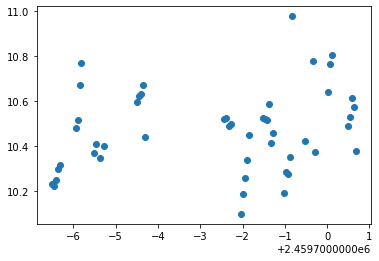

In [81]:
plt.scatter(times, mags_var)

In [86]:
period = 0.91
time_fix = []
time_fix.append(0)
for i in range (1,len(times)):
    fix = (times[i] - times[0]) % period
    time_fix.append(fix)

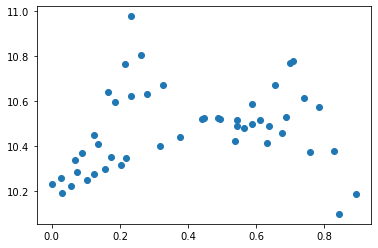

In [87]:
plt.scatter(time_fix, mags_var)

In [76]:
true_ref_mag = 12 #test value since struggling with open filter
mags_fix = []
mags_ref_fixed = []
mags_var_fixed = []

for i in range (0, len(mags_ref)):
    mags_fix.append(true_ref_mag - mags_ref[i])
    
    mags_ref_fixed.append(mags_ref[i] + mags_fix[i])
    mags_var_fixed.append(mags_var[i] + mags_fix[i])
#this isnt working right now

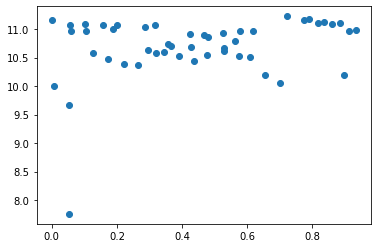

In [78]:
plt.scatter(time_fix, mags_var_fixed)